# Peptidase analysis

Author: Sandra Godinho Silva \
Creation date: 24/11/2020 \
Version: 0.3

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Metadata

In [5]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family", "scaf_bp", "Origin"]]
metadata.head(2)

,Assembly accession,Genus,Family,scaf_bp,Origin
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae,6096872,Non_marine
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae,2612925,Non_marine


## Merops annotation

In [6]:
#vir_orfs = pd.read_csv("../../3_Annotation/Merops/merops_counts.csv")
vir_orfs = pd.read_csv("Merops_results/merops_counts.csv")
vir_orfs = vir_orfs.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
vir_orfs["Merops orfs total"] = vir_orfs.sum(axis=1)
vir_orfs2 = vir_orfs.copy()
vir_orfs = vir_orfs.reset_index()
vir_orfs.head()

ID,index,MER0001423,MER0001295,MER0192051,MER0001009,MER0028365,MER0281397,MER0095620,MER0034615,MER0036115,MER0003514,MER0002251,MER0031610,MER0000474,MER0037236,MER0034539,MER0069741,MER0047723,MER0001421,MER0437468,MER0045886,MER0019759,MER0001158,MER0014664,MER0033186,MER0002084,MER0001521,MER0066178,MER0001978,MER0004146,MER0026545,MER0000485,MER0010975,MER0034582,MER0042827,MER0004090,MER0031431,MER0001322,MER0015121,MER0048181,MER0000410,MER0003413,MER0195774,MER0013623,MER0004035,MER0030932,MER0060647,MER0015475,MER0039993,MER0001161,MER0002639,MER0026262,MER0001400,MER0044357,MER0025086,MER0003380,MER0011781,MER0012158,MER0014135,MER0004775,MER0011440,MER0004469,MER0016191,MER0035036,MER0013626,MER0005196,MER0005768,MER0013976,MER0209507,MER0005767,MER0005169,MER0003242,MER0005139,MER0005496,MER0065588,MER0168983,MER0028934,MER0001012,MER0013876,MER0026552,MER0073084,MER0056037,MER0042581,MER0003339,MER0034541,MER0017033,MER0044622,MER0005244,MER0027775,MER1143079,MER0000389,MER0026494,MER0001244,MER0017177,MER0001297,MER0001243,MER0001299,MER0014366,MER0016185,MER0036308,MER0005300,MER0002959,MER0014065,MER0056047,MER0004914,MER0035973,MER0030244,MER0002968,MER0015424,MER0059846,MER0897124,MER0003338,MER0000277,MER0011464,MER0000831,MER0140154,MER0002443,MER0003972,MER0006319,MER0005900,MER0010944,MER0001121,MER0042387,MER0013458,MER0077555,MER0031611,MER0003376,MER0011411,MER0001920,MER0002031,MER0005694,MER0059675,MER0000589,MER0017123,MER0002489,MER0005663,MER0062058,MER0031565,MER0004725,MER0001289,MER0005764,MER0003823,MER0036053,MER0001284,MER0491616,MER0000338,MER0001699,MER0005124,MER0042974,MER0001266,MER0013957,MER0223899,MER0033259,MER0013471,MER0027368,MER0100667,MER0066182,MER0001123,MER0033274,MER0492485,MER0001513,MER0002007,MER0017069,MER0013541,MER0187003,MER0038688,MER0005462,MER0017243,MER0017250,MER0001287,MER0003280,MER0000392,MER0003906,MER0156574,MER0036072,MER0000332,MER0002755,MER0065554,MER0173063,MER0015473,MER0014137,MER0017367,MER0003336,MER0000443,MER0011900,MER0030136,MER0003537,MER0036027,MER0028704,MER0017368,MER0004925,MER0000436,MER0004196,MER0002036,MER0001945,MER0011720,MER0195376,MER0015142,MER0198917,MER0004160,MER0028087,MER0016301,MER0028025,MER0000495,MER0001313,MER0003850,MER0028047,MER0213595,MER0001350,MER0004931,MER0043394,MER0056525,MER0078640,MER0036114,MER0002565,MER0002060,MER0011509,MER0000471,MER0045094,MER0175622,MER0017401,MER0000432,MER0023167,MER0061102,MER0026339,MER0013425,MER0034548,MER0030235,MER0043126,MER0034659,MER0031563,MER0001236,MER0000472,MER0056022,MER0015462,MER0015691,MER0214939,MER0004199,MER0018254,MER0017248,MER0002601,MER0028284,MER0023251,MER0003105,MER0004801,MER0004154,MER0002746,MER0019881,MER0014333,MER0036073,MER0011416,MER0029719,MER0034558,MER0020326,MER0043008,MER0017142,MER0030934,MER0001612,MER0024252,MER0000265,MER0044996,MER0026213,MER0011256,MER0004954,MER0002642,MER0004514,MER0033237,MER0000313,MER0011907,MER0013450,MER0001269,MER0237414,MER0045479,MER0031432,MER0026496,MER0015621,MER0000310,MER0019096,MER0000320,MER0016067,MER0014188,MER0031558,MER0017239,MER0036052,MER0019092,MER0015632,MER0018473,MER0003327,MER0011345,MER0011806,MER0003448,MER0001233,MER0044578,MER0003359,MER0035017,MER0004321,MER0036038,MER0015336,MER0183709,MER0107796,MER0035032,MER0003817,MER0001425,MER0005778,MER0428540,MER0031556,MER0036036,MER0014721,MER0091680,MER0002655,MER0004468,MER0012283,MER0004923,MER0013829,MER0000263,MER0002161,MER0014418,MER0011700,MER0031491,MER0001333,MER0026471,MER0003558,MER0031562,MER0002014,MER0067221,MER0167712,MER0017193,MER0011583,MER0000431,MER0033176,MER0000576,MER0013479,MER0003543,MER0015166,MER0219770,MER0001495,MER0011369,MER0031614,MER0472834,MER0003812,MER0014140,MER0034745,MER0006204,MER0031618,MER0002455,MER0015657,MER0017009,MER0006198,MER0005045,MER0011666,MER0015415,MER0001010,MER0200437,MER0015684,MER0001380,MER0015459,MER0001520,MER0036047,MER0066184,MER0005821,MER0001026,MER0005925,MER0003986,MER000448

In [7]:
merops = vir_orfs[["index", "Merops orfs total"]]
merops.head()

ID,index,Merops orfs total
0,GCA_900186545.1,107
1,GCA_900312745.1,269
2,GCA_006716485.1,213
3,GCA_009799805.1,108
4,GCA_900610345.1,106


In [8]:
vir_orfs3 = vir_orfs2.copy()
vir_orfs3 = vir_orfs3.drop(columns=["Merops orfs total"]).T
vir_orfs3["Total in dataset"] = vir_orfs3.sum(axis=1)
vir_orfs3 = vir_orfs3.sort_values("Total in dataset", ascending=False)
vir_orfs3.head()

,GCA_900186545.1,GCA_900312745.1,GCA_006716485.1,GCA_009799805.1,GCA_900610345.1,GCA_000425505.1,GCA_900105105.1,GCA_002715085.1,GCA_003812705.1,GCA_009921505.1,GCA_014138495.1,GCA_002472765.1,GCA_002719535.1,GCA_002943675.1,GCA_002388705.1,GCA_004321735.1,GCA_004368925.1,GCA_014220145.1,GCA_002737105.1,GCA_001280505.1,GCA_012932585.1,GCA_002345305.1,GCA_003243255.1,GCA_009870135.1,GCA_903819445.1,GCA_003634585.1,GCA_902168145.1,GCA_009659705.1,GCA_003626835.1,GCA_013043105.1,GCA_009834475.1,GCA_002477625.1,GCA_014218885.1,GCA_000428485.1,GCA_900538225.1,GCA_003454375.1,GCA_004010055.1,GCA_003410315.1,GCA_001618545.2,GCA_004341805.1,GCA_002376145.1,GCA_002364335.1,GCA_001045455.1,GCA_011752975.1,GCA_000611675.1,GCA_001418085.1,GCA_014220365.1,GCA_002338325.1,GCA_013404085.1,GCA_000282115.1,GCA_900099995.1,GCA_013205245.1,GCA_004362395.1,GCA_000496035.1,GCA_000152985.1,GCA_004121075.1,GCA_900167905.1,GCA_000747685.1,GCA_003815655.1,GCA_003626755.1,GCA_004346845.1,GCA_001280515.1,GCA_001464475.1,GCA_900198195.1,GCA_000789235.1,GCA_002430025.1,GCA_000220625.1,GCA_003538255.1,GCA_900092085.1,GCA_001430825.1,GCA_001800975.1,GCA_003815875.1,GCA_000430665.1,GCA_902804485.1,GCA_002001005.1,GCA_003511865.1,GCA_900142775.1,GCA_002201315.1,GCA_900099675.1,GCA_000382425.1,GCA_004916905.1,GCA_900156625.1,GCA_010993855.1,GCA_000153485.2,GCA_014220755.1,GCA_000496015.1,GCA_000173095.1,GCA_006491645.1,GCA_900156685.1,GCA_013042255.1,GCA_900104375.1,GCA_000468595.1,GCA_000812985.1,GCA_013001145.1,GCA_002703565.1,GCA_002023425.1,GCA_007109225.1,GCA_009684755.1,GCA_002454095.1,GCA_003386855.1,GCA_003516945.1,GCA_002710605.1,GCA_013410675.1,GCA_008081325.1,GCA_003001695.1,GCA_900156585.1,GCA_003581615.1,GCA_000568425.1,GCA_003337305.1,GCA_003314435.2,GCA_002117085.1,GCA_008017345.1,GCA_003350545.1,GCA_004349195.1,GCA_000333355.1,GCA_008000935.1,GCA_000192225.1,GCA_002323395.1,GCA_014202195.1,GCA_900106825.1,GCA_002345565.1,GCA_013002225.1,GCA_003504555.1,GCA_003971235.1,GCA_000812865.1,GCA_002964975.1,GCA_013001285.1,GCA_009648535.1,GCA_003984825.1,GCA_001898255.1,GCA_900186805.1,GCA_900312815.1,GCA_002302515.1,GCA_002320285.1,GCA_002023325.1,GCA_900141665.1,GCA_009792295.1,GCA_001027945.1,GCA_014220615.1,GCA_000271925.1,GCA_005780245.1,GCA_001438125.1,GCA_002023665.2,GCA_007997115.1,GCA_004349355.1,GCA_002470025.1,GCA_009711165.1,GCA_004211875.1,GCA_001898785.1,GCA_010365135.1,GCA_900610225.1,GCA_002024825.1,GCA_002683555.1,GCA_003024155.1,GCA_002440605.1,GCA_002954665.1,GCA_002770595.1,GCA_001549985.1,GCA_000744105.1,GCA_009753805.1,GCA_002414635.1,GCA_000425485.1,GCA_013276225.1,GCA_900111025.1,GCA_002471745.1,GCA_002716845.1,GCA_002365615.1,GCA_014050215.1,GCA_014220245.1,GCA_002222055.1,GCA_010725055.1,GCA_000423065.1,GCA_001672305.1,GCA_002453775.1,GCA_011525065.1,GCA_004216895.1,GCA_006716585.1,GCA_002198115.1,GCA_003385495.1,GCA_004366435.1,GCA_002311725.1,GCA_002428305.1,GCA_003992595.1,GCA_004959765.1,GCA_003688495.1,GCA_011601245.1,GCA_900148835.1,GCA_900110335.1,GCA_002433125.1,GCA_002754245.1,GCA_004364975.1,GCA_012269955.1,GCA_002843175.1,GCA_013204145.1,GCA_003867075.1,GCA_004349145.1,GCA_000971645.2,GCA_002714815.1,GCA_001573155.1,GCA_002696305.1,GCA_000297855.1,GCA_000799195.1,GCA_014305215.1,GCA_009865665.1,GCA_000332115.1,GCA_002781585.1,GCA_900610045.1,GCA_001995115.1,GCA_000422265.1,GCA_002728045.1,GCA_013003145.1,GCA_004214175.1,GCA_900624725.1,GCA_900168045.1,GCA_002726175.1,GCA_001428525.1,GCA_002217355.1,GCA_002217395.1,GCA_002482885.1,GCA_002754195.1,GCA_000729985.1,GCA_900239185.1,GCA_002022025.1,GCA_011764015.1,GCA_007827205.1,GCA_900129545.1,GCA_003208535.1,GCA_002709185.1,GCA_003268815.1,GCA_005885635.1,GCA_002747735.1,GCA_002733185.1,GCA_000382125.1,GCA_001683915.1,GCA_006381105.1,GCA_004310335.1,GCA_000173115.1,GCA_004295795.1,GCA_009848495.1,GCA_001693475.1,GCA_012974865.1,GCA_003387615.1,GCA_014220795.1,GCA_001889005.1,GCA_000224085.1,GCA_003614945.1,GCA_001027725.1,GCA_900104765.1,GCA_002363875.1,GCA_003253545.1

# Map

In [9]:
map_vfs = pd.read_csv("../../3_Annotation/Merops/merops_ids.csv")
map_vfs.tail()

,ID,name,organism,desc,source
5004,MER1153742,Mug105,Saccharomyces pombe,NaN,NaN
5005,MER1239413,mavirus processing peptidase,NaN,[C120.001]#C120#{peptidase unit: 1-189},YP_004300294
5006,MER1251407,NaN,Homo sapiens,[C121.002]#C121#{peptidase unit: 441-713},MINY4_HUMAN
5007,MER1251425,MINDY-4 peptidase,Homo sapiens,[C121.001]#C121#{peptidase unit: 12-261},MINY3_HUMAN
5008,MER1365461,strawberry mottle virus glutamic peptidase,NaN,[G03.001]#G03#{peptidase unit: 1102-1335},A0A142I1A6


In [10]:
map_vfs["ID"].value_counts()

MER0024760    1
MER0014064    1
MER0018320    1
MER0005855    1
MER0011298    1
             ..
MER0004975    1
MER0169983    1
MER0018575    1
MER0018096    1
MER0079393    1
Name: ID, Length: 5009, dtype: int64

In [11]:
vir_orfs4 = pd.merge(vir_orfs3, map_vfs, how="left", left_index=True, right_on="ID")
vir_orfs4.head(2)

,GCA_900186545.1,GCA_900312745.1,GCA_006716485.1,GCA_009799805.1,GCA_900610345.1,GCA_000425505.1,GCA_900105105.1,GCA_002715085.1,GCA_003812705.1,GCA_009921505.1,GCA_014138495.1,GCA_002472765.1,GCA_002719535.1,GCA_002943675.1,GCA_002388705.1,GCA_004321735.1,GCA_004368925.1,GCA_014220145.1,GCA_002737105.1,GCA_001280505.1,GCA_012932585.1,GCA_002345305.1,GCA_003243255.1,GCA_009870135.1,GCA_903819445.1,GCA_003634585.1,GCA_902168145.1,GCA_009659705.1,GCA_003626835.1,GCA_013043105.1,GCA_009834475.1,GCA_002477625.1,GCA_014218885.1,GCA_000428485.1,GCA_900538225.1,GCA_003454375.1,GCA_004010055.1,GCA_003410315.1,GCA_001618545.2,GCA_004341805.1,GCA_002376145.1,GCA_002364335.1,GCA_001045455.1,GCA_011752975.1,GCA_000611675.1,GCA_001418085.1,GCA_014220365.1,GCA_002338325.1,GCA_013404085.1,GCA_000282115.1,GCA_900099995.1,GCA_013205245.1,GCA_004362395.1,GCA_000496035.1,GCA_000152985.1,GCA_004121075.1,GCA_900167905.1,GCA_000747685.1,GCA_003815655.1,GCA_003626755.1,GCA_004346845.1,GCA_001280515.1,GCA_001464475.1,GCA_900198195.1,GCA_000789235.1,GCA_002430025.1,GCA_000220625.1,GCA_003538255.1,GCA_900092085.1,GCA_001430825.1,GCA_001800975.1,GCA_003815875.1,GCA_000430665.1,GCA_902804485.1,GCA_002001005.1,GCA_003511865.1,GCA_900142775.1,GCA_002201315.1,GCA_900099675.1,GCA_000382425.1,GCA_004916905.1,GCA_900156625.1,GCA_010993855.1,GCA_000153485.2,GCA_014220755.1,GCA_000496015.1,GCA_000173095.1,GCA_006491645.1,GCA_900156685.1,GCA_013042255.1,GCA_900104375.1,GCA_000468595.1,GCA_000812985.1,GCA_013001145.1,GCA_002703565.1,GCA_002023425.1,GCA_007109225.1,GCA_009684755.1,GCA_002454095.1,GCA_003386855.1,GCA_003516945.1,GCA_002710605.1,GCA_013410675.1,GCA_008081325.1,GCA_003001695.1,GCA_900156585.1,GCA_003581615.1,GCA_000568425.1,GCA_003337305.1,GCA_003314435.2,GCA_002117085.1,GCA_008017345.1,GCA_003350545.1,GCA_004349195.1,GCA_000333355.1,GCA_008000935.1,GCA_000192225.1,GCA_002323395.1,GCA_014202195.1,GCA_900106825.1,GCA_002345565.1,GCA_013002225.1,GCA_003504555.1,GCA_003971235.1,GCA_000812865.1,GCA_002964975.1,GCA_013001285.1,GCA_009648535.1,GCA_003984825.1,GCA_001898255.1,GCA_900186805.1,GCA_900312815.1,GCA_002302515.1,GCA_002320285.1,GCA_002023325.1,GCA_900141665.1,GCA_009792295.1,GCA_001027945.1,GCA_014220615.1,GCA_000271925.1,GCA_005780245.1,GCA_001438125.1,GCA_002023665.2,GCA_007997115.1,GCA_004349355.1,GCA_002470025.1,GCA_009711165.1,GCA_004211875.1,GCA_001898785.1,GCA_010365135.1,GCA_900610225.1,GCA_002024825.1,GCA_002683555.1,GCA_003024155.1,GCA_002440605.1,GCA_002954665.1,GCA_002770595.1,GCA_001549985.1,GCA_000744105.1,GCA_009753805.1,GCA_002414635.1,GCA_000425485.1,GCA_013276225.1,GCA_900111025.1,GCA_002471745.1,GCA_002716845.1,GCA_002365615.1,GCA_014050215.1,GCA_014220245.1,GCA_002222055.1,GCA_010725055.1,GCA_000423065.1,GCA_001672305.1,GCA_002453775.1,GCA_011525065.1,GCA_004216895.1,GCA_006716585.1,GCA_002198115.1,GCA_003385495.1,GCA_004366435.1,GCA_002311725.1,GCA_002428305.1,GCA_003992595.1,GCA_004959765.1,GCA_003688495.1,GCA_011601245.1,GCA_900148835.1,GCA_900110335.1,GCA_002433125.1,GCA_002754245.1,GCA_004364975.1,GCA_012269955.1,GCA_002843175.1,GCA_013204145.1,GCA_003867075.1,GCA_004349145.1,GCA_000971645.2,GCA_002714815.1,GCA_001573155.1,GCA_002696305.1,GCA_000297855.1,GCA_000799195.1,GCA_014305215.1,GCA_009865665.1,GCA_000332115.1,GCA_002781585.1,GCA_900610045.1,GCA_001995115.1,GCA_000422265.1,GCA_002728045.1,GCA_013003145.1,GCA_004214175.1,GCA_900624725.1,GCA_900168045.1,GCA_002726175.1,GCA_001428525.1,GCA_002217355.1,GCA_002217395.1,GCA_002482885.1,GCA_002754195.1,GCA_000729985.1,GCA_900239185.1,GCA_002022025.1,GCA_011764015.1,GCA_007827205.1,GCA_900129545.1,GCA_003208535.1,GCA_002709185.1,GCA_003268815.1,GCA_005885635.1,GCA_002747735.1,GCA_002733185.1,GCA_000382125.1,GCA_001683915.1,GCA_006381105.1,GCA_004310335.1,GCA_000173115.1,GCA_004295795.1,GCA_009848495.1,GCA_001693475.1,GCA_012974865.1,GCA_003387615.1,GCA_014220795.1,GCA_001889005.1,GCA_000224085.1,GCA_003614945.1,GCA_001027725.1,GCA_900104765.1,GCA_002363875.1,GCA_003253545.1

In [12]:
vir_orfs5 = vir_orfs4.groupby("name").sum()
vir_orfs5 = vir_orfs5.T.reset_index()
vir_orfs5.head(2)

name,index,1700122C07Rik protein,"2-hydroxy-6-oxo-6-phenylhexa-2,4-dienoate hydrolase",2210023G05RIK protein,9030624L02RIK-like protein,ADAM1 g.p.,ADAM1 peptidase,ADAM10 peptidase,ADAM12 peptidase,ADAM13 peptidase,ADAM19 peptidase,ADAM20 peptidase,ADAM21 peptidase,ADAM24 peptidase,ADAM26 peptidase,ADAM28 peptidase,ADAM8 peptidase,ADAM9 peptidase,ALE-1 glycylglycine endopeptidase,ALTERED MERISTEM PROGRAM1-like peptidase,AM-1 aminopeptidase,ARASP g.p.,ASUB peptidase,AT3G03240 protein,AT4g33090 g.p.,AT5G17720 protein,AT5G17780 protein,AT5G20060 protein,AT5G22460 protein,AaaA aminopeptidase,Aad peptidase,Aap1' aminopeptidase,AarA peptidase,Abhd2a protein,Afg3-like protein 2,AlbD protein,AmpH protein,Anbu protein,Ape2 aminopeptidase,Apr peptidase,AprP peptidase,AprX peptidase,AraSP peptidase,ArgJ protein,AsnB protein,AspA,At1g02560,At1g06260,At1g11080,At1g11090,At1g12750,At1g13270,At1g13610,At1g14270,At1g15045,At1g17430,At1g18360,At1g18600,At1g20380,At1g24140,At1g25220,At1g25290,At1g26120,At1g28110,At1g29840,At1g32190,At1g33540,At1g51760,At1g52580,At1g52760,At1g59970-type peptidase,At1g63660,At1g64670,At1g65630,At1g65640,At1g66670,At1g66900,At1g67420,At1g68620,At1g68900,At1g69020 g.p.,At1g70170,At1g71696,At1g72620,At1g73290,At1g73300,At1g73310,At1g73480,At1g74280,At1g76140,At1g77420,At1g78210,At2g15230 protein,At2g16570,At2g18360,At2g19550,At2g20725,At2g22990,At2g23000,At2g23010,At2g24200,At2g24320,At2g29050,At2g39400,At2g39410,At2g39420,At2g45040,At2g45600,At2g47630,At3g01690,At3g02720,At3g02875,At3g03990,At3g05350,At3g05780,At3g09690,At3g10450,At3g10840 protein,At3g12220,At3g16150,At3g16550,At3g26085,At3g27320,At3g27740,At3g30380,At3g47560,At3g47590,At3g48690,At3g52000,At3g52020,At3g53780,At3g54600,At3g55180,At3g56540,At3g57470,At3g57680,At4g10030,At4g10050,At4g16640,At4g17150,At4g20430,At4g23070,At4g24150,At4g29210,At4g30910,At4g31020,At4g33180/At4g33190,At4g34740,At4g36530,At4g36610,At4g36760 g.p.,At4g37040,At4g37470,At4g38880,At4g39650,At5g02970,At5g04710,At5g07250,At5g08100,At5g09430,At5g09640,At5g11650,At5g13520 g.p.,At5g13800,At5g14310,At5g14390,At5g15860,At5g16080,At5g16120,At5g16310,At5g19290,At5g19630,At5g19740,At5g19850,At5g20520,At5g20660,At5g21950,At5g23140,At5g23210,At5g23530,At5g24260,At5g25770,At5g26860,At5g36950,At5g38220,At5g38520,At5g39220,At5g40560,At5g41900,At5g42320,At5g46390,At5g51740,At5g53050 or MhpC protein,At5g54140,At5g56650,At5g56730,At5g59190,At5g60160,At5g62180,At5g67090,AtFtsH1 peptidase,AtFtsH10 peptidase,AtFtsH11 peptidase,AtFtsH3 peptidase,AtFtsH5 peptidase,B0464.9 g.p.,B0495.7 g.p.,BACCAC_01431 g.p.,BC026374 protein,BC4143 protein,BF9343_2924 g.p.,BG:DS00365.1 protein,BIRC-3 protein,BSNT_05883 g.p.,BSSC8_21440 g.p.,BSSC8_26020 g.p.,BSU23640 g.p.,BSU33620 g.p.,BSU6633_13517 g.p.,BSU6633_13792 g.p.,BSn5_05605 g.p.,BT3549 putative peptidase,BapA peptidase,BapF peptidase,BcepAP aminopeptidase,BepA,BioH protein,BlaR1 peptidase,BmSPI inhibitor,BmooMPalpha-I,Brcc36 isopeptidase,Bsubs1_010100013116 g.p.,C-terminal processing peptidase-1,C-terminal processing peptidase-2,C-terminal processing peptidase-3,C02G6.1 g.p.,C06C3.8 g.p.,C14orf29 protein,C31H5.1 g.p.,C31H5.6 g.p.,C35C5.2 g.p.,C44E12.1 g.p.,CAAX amino terminal peptidase,CC-III peptidase,CDF peptidase,CG10051 protein,CG10062 protein,CG1009 g.p.,CG10602 g.p.,CG11309 protein,CG11319,CG11428,CG11529 protein,CG11836 protein,CG11865 protein,CG11951 protein,CG11956 protein,CG11961 protein,CG12133 protein,CG12374 protein,CG13160 protein,CG15111 protein,CG15253 protein,CG15820 protein,CG15879 protein,CG17571 protein,CG17633 protein,CG18530 protein,CG18642,CG18735 protein,CG1882 protein,CG2528 protein,CG2915 protein,CG3097 protein,CG3108 protein,CG31343 protein,CG32379 protein,CG32523 protein,CG3502 protein,CG4017 protein,CG42750 g.p.,CG4420 g.p.,CG4927 protein,CG5367 protein,CG5377,CG5704 protein,CG5707 protein,CG5715 protein,CG5845 protein,CG5909 protein,CG6154 protein,CG6512 protein,CG6696 protein,CG6763 protein,CG7025 protein,CG7142 protein,CG7529 prot

### Merge with metadata:

In [13]:
df = pd.merge(vir_orfs, metadata, left_on="index", left_index=True, right_on="Assembly accession")
df.head(2)

,index,MER0001423,MER0001295,MER0192051,MER0001009,MER0028365,MER0281397,MER0095620,MER0034615,MER0036115,MER0003514,MER0002251,MER0031610,MER0000474,MER0037236,MER0034539,MER0069741,MER0047723,MER0001421,MER0437468,MER0045886,MER0019759,MER0001158,MER0014664,MER0033186,MER0002084,MER0001521,MER0066178,MER0001978,MER0004146,MER0026545,MER0000485,MER0010975,MER0034582,MER0042827,MER0004090,MER0031431,MER0001322,MER0015121,MER0048181,MER0000410,MER0003413,MER0195774,MER0013623,MER0004035,MER0030932,MER0060647,MER0015475,MER0039993,MER0001161,MER0002639,MER0026262,MER0001400,MER0044357,MER0025086,MER0003380,MER0011781,MER0012158,MER0014135,MER0004775,MER0011440,MER0004469,MER0016191,MER0035036,MER0013626,MER0005196,MER0005768,MER0013976,MER0209507,MER0005767,MER0005169,MER0003242,MER0005139,MER0005496,MER0065588,MER0168983,MER0028934,MER0001012,MER0013876,MER0026552,MER0073084,MER0056037,MER0042581,MER0003339,MER0034541,MER0017033,MER0044622,MER0005244,MER0027775,MER1143079,MER0000389,MER0026494,MER0001244,MER0017177,MER0001297,MER0001243,MER0001299,MER0014366,MER0016185,MER0036308,MER0005300,MER0002959,MER0014065,MER0056047,MER0004914,MER0035973,MER0030244,MER0002968,MER0015424,MER0059846,MER0897124,MER0003338,MER0000277,MER0011464,MER0000831,MER0140154,MER0002443,MER0003972,MER0006319,MER0005900,MER0010944,MER0001121,MER0042387,MER0013458,MER0077555,MER0031611,MER0003376,MER0011411,MER0001920,MER0002031,MER0005694,MER0059675,MER0000589,MER0017123,MER0002489,MER0005663,MER0062058,MER0031565,MER0004725,MER0001289,MER0005764,MER0003823,MER0036053,MER0001284,MER0491616,MER0000338,MER0001699,MER0005124,MER0042974,MER0001266,MER0013957,MER0223899,MER0033259,MER0013471,MER0027368,MER0100667,MER0066182,MER0001123,MER0033274,MER0492485,MER0001513,MER0002007,MER0017069,MER0013541,MER0187003,MER0038688,MER0005462,MER0017243,MER0017250,MER0001287,MER0003280,MER0000392,MER0003906,MER0156574,MER0036072,MER0000332,MER0002755,MER0065554,MER0173063,MER0015473,MER0014137,MER0017367,MER0003336,MER0000443,MER0011900,MER0030136,MER0003537,MER0036027,MER0028704,MER0017368,MER0004925,MER0000436,MER0004196,MER0002036,MER0001945,MER0011720,MER0195376,MER0015142,MER0198917,MER0004160,MER0028087,MER0016301,MER0028025,MER0000495,MER0001313,MER0003850,MER0028047,MER0213595,MER0001350,MER0004931,MER0043394,MER0056525,MER0078640,MER0036114,MER0002565,MER0002060,MER0011509,MER0000471,MER0045094,MER0175622,MER0017401,MER0000432,MER0023167,MER0061102,MER0026339,MER0013425,MER0034548,MER0030235,MER0043126,MER0034659,MER0031563,MER0001236,MER0000472,MER0056022,MER0015462,MER0015691,MER0214939,MER0004199,MER0018254,MER0017248,MER0002601,MER0028284,MER0023251,MER0003105,MER0004801,MER0004154,MER0002746,MER0019881,MER0014333,MER0036073,MER0011416,MER0029719,MER0034558,MER0020326,MER0043008,MER0017142,MER0030934,MER0001612,MER0024252,MER0000265,MER0044996,MER0026213,MER0011256,MER0004954,MER0002642,MER0004514,MER0033237,MER0000313,MER0011907,MER0013450,MER0001269,MER0237414,MER0045479,MER0031432,MER0026496,MER0015621,MER0000310,MER0019096,MER0000320,MER0016067,MER0014188,MER0031558,MER0017239,MER0036052,MER0019092,MER0015632,MER0018473,MER0003327,MER0011345,MER0011806,MER0003448,MER0001233,MER0044578,MER0003359,MER0035017,MER0004321,MER0036038,MER0015336,MER0183709,MER0107796,MER0035032,MER0003817,MER0001425,MER0005778,MER0428540,MER0031556,MER0036036,MER0014721,MER0091680,MER0002655,MER0004468,MER0012283,MER0004923,MER0013829,MER0000263,MER0002161,MER0014418,MER0011700,MER0031491,MER0001333,MER0026471,MER0003558,MER0031562,MER0002014,MER0067221,MER0167712,MER0017193,MER0011583,MER0000431,MER0033176,MER0000576,MER0013479,MER0003543,MER0015166,MER0219770,MER0001495,MER0011369,MER0031614,MER0472834,MER0003812,MER0014140,MER0034745,MER0006204,MER0031618,MER0002455,MER0015657,MER0017009,MER0006198,MER0005045,MER0011666,MER0015415,MER0001010,MER0200437,MER0015684,MER0001380,MER0015459,MER0001520,MER0036047,MER0066184,MER0005821,MER0001026,MER0005925,MER0003986,MER0004480,

In [14]:
df_namevfcode = pd.merge(vir_orfs5, metadata, left_on="index", left_index=True, right_on="Assembly accession")
df_namevfcode.head()

,index,1700122C07Rik protein,"2-hydroxy-6-oxo-6-phenylhexa-2,4-dienoate hydrolase",2210023G05RIK protein,9030624L02RIK-like protein,ADAM1 g.p.,ADAM1 peptidase,ADAM10 peptidase,ADAM12 peptidase,ADAM13 peptidase,ADAM19 peptidase,ADAM20 peptidase,ADAM21 peptidase,ADAM24 peptidase,ADAM26 peptidase,ADAM28 peptidase,ADAM8 peptidase,ADAM9 peptidase,ALE-1 glycylglycine endopeptidase,ALTERED MERISTEM PROGRAM1-like peptidase,AM-1 aminopeptidase,ARASP g.p.,ASUB peptidase,AT3G03240 protein,AT4g33090 g.p.,AT5G17720 protein,AT5G17780 protein,AT5G20060 protein,AT5G22460 protein,AaaA aminopeptidase,Aad peptidase,Aap1' aminopeptidase,AarA peptidase,Abhd2a protein,Afg3-like protein 2,AlbD protein,AmpH protein,Anbu protein,Ape2 aminopeptidase,Apr peptidase,AprP peptidase,AprX peptidase,AraSP peptidase,ArgJ protein,AsnB protein,AspA,At1g02560,At1g06260,At1g11080,At1g11090,At1g12750,At1g13270,At1g13610,At1g14270,At1g15045,At1g17430,At1g18360,At1g18600,At1g20380,At1g24140,At1g25220,At1g25290,At1g26120,At1g28110,At1g29840,At1g32190,At1g33540,At1g51760,At1g52580,At1g52760,At1g59970-type peptidase,At1g63660,At1g64670,At1g65630,At1g65640,At1g66670,At1g66900,At1g67420,At1g68620,At1g68900,At1g69020 g.p.,At1g70170,At1g71696,At1g72620,At1g73290,At1g73300,At1g73310,At1g73480,At1g74280,At1g76140,At1g77420,At1g78210,At2g15230 protein,At2g16570,At2g18360,At2g19550,At2g20725,At2g22990,At2g23000,At2g23010,At2g24200,At2g24320,At2g29050,At2g39400,At2g39410,At2g39420,At2g45040,At2g45600,At2g47630,At3g01690,At3g02720,At3g02875,At3g03990,At3g05350,At3g05780,At3g09690,At3g10450,At3g10840 protein,At3g12220,At3g16150,At3g16550,At3g26085,At3g27320,At3g27740,At3g30380,At3g47560,At3g47590,At3g48690,At3g52000,At3g52020,At3g53780,At3g54600,At3g55180,At3g56540,At3g57470,At3g57680,At4g10030,At4g10050,At4g16640,At4g17150,At4g20430,At4g23070,At4g24150,At4g29210,At4g30910,At4g31020,At4g33180/At4g33190,At4g34740,At4g36530,At4g36610,At4g36760 g.p.,At4g37040,At4g37470,At4g38880,At4g39650,At5g02970,At5g04710,At5g07250,At5g08100,At5g09430,At5g09640,At5g11650,At5g13520 g.p.,At5g13800,At5g14310,At5g14390,At5g15860,At5g16080,At5g16120,At5g16310,At5g19290,At5g19630,At5g19740,At5g19850,At5g20520,At5g20660,At5g21950,At5g23140,At5g23210,At5g23530,At5g24260,At5g25770,At5g26860,At5g36950,At5g38220,At5g38520,At5g39220,At5g40560,At5g41900,At5g42320,At5g46390,At5g51740,At5g53050 or MhpC protein,At5g54140,At5g56650,At5g56730,At5g59190,At5g60160,At5g62180,At5g67090,AtFtsH1 peptidase,AtFtsH10 peptidase,AtFtsH11 peptidase,AtFtsH3 peptidase,AtFtsH5 peptidase,B0464.9 g.p.,B0495.7 g.p.,BACCAC_01431 g.p.,BC026374 protein,BC4143 protein,BF9343_2924 g.p.,BG:DS00365.1 protein,BIRC-3 protein,BSNT_05883 g.p.,BSSC8_21440 g.p.,BSSC8_26020 g.p.,BSU23640 g.p.,BSU33620 g.p.,BSU6633_13517 g.p.,BSU6633_13792 g.p.,BSn5_05605 g.p.,BT3549 putative peptidase,BapA peptidase,BapF peptidase,BcepAP aminopeptidase,BepA,BioH protein,BlaR1 peptidase,BmSPI inhibitor,BmooMPalpha-I,Brcc36 isopeptidase,Bsubs1_010100013116 g.p.,C-terminal processing peptidase-1,C-terminal processing peptidase-2,C-terminal processing peptidase-3,C02G6.1 g.p.,C06C3.8 g.p.,C14orf29 protein,C31H5.1 g.p.,C31H5.6 g.p.,C35C5.2 g.p.,C44E12.1 g.p.,CAAX amino terminal peptidase,CC-III peptidase,CDF peptidase,CG10051 protein,CG10062 protein,CG1009 g.p.,CG10602 g.p.,CG11309 protein,CG11319,CG11428,CG11529 protein,CG11836 protein,CG11865 protein,CG11951 protein,CG11956 protein,CG11961 protein,CG12133 protein,CG12374 protein,CG13160 protein,CG15111 protein,CG15253 protein,CG15820 protein,CG15879 protein,CG17571 protein,CG17633 protein,CG18530 protein,CG18642,CG18735 protein,CG1882 protein,CG2528 protein,CG2915 protein,CG3097 protein,CG3108 protein,CG31343 protein,CG32379 protein,CG32523 protein,CG3502 protein,CG4017 protein,CG42750 g.p.,CG4420 g.p.,CG4927 protein,CG5367 protein,CG5377,CG5704 protein,CG5707 protein,CG5715 protein,CG5845 protein,CG5909 protein,CG6154 protein,CG6512 protein,CG6696 protein,CG6763 protein,CG7025 protein,CG7142 protein,CG7529 protein,

# Plot

In [15]:
df1 = df.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean()
df1 = df1.reset_index()
# 
df1 = df1.sort_values(by=["Family", "Genus"])
df1 = df1.drop(columns="Family")
df1 = df1.sort_index(axis=1, ascending=False)
df1.head()

,scaf_bp,Merops orfs total,MER1143079,MER1137211,MER1104031,MER1102827,MER1054487,MER0981959,MER0897124,MER0789282,MER0788421,MER0661299,MER0533496,MER0494979,MER0492485,MER0491616,MER0472834,MER0441632,MER0437468,MER0436735,MER0436717,MER0428540,MER0397096,MER0390687,MER0388771,MER0387040,MER0377178,MER0369972,MER0369336,MER0364556,MER0354941,MER0331730,MER0321345,MER0307302,MER0306550,MER0301495,MER0284643,MER0281397,MER0266478,MER0264123,MER0250412,MER0250360,MER0250357,MER0250336,MER0250335,MER0250299,MER0242447,MER0241741,MER0238682,MER0237414,MER0230379,MER0226569,MER0223899,MER0223878,MER0221018,MER0219770,MER0217397,MER0217243,MER0216686,MER0214982,MER0214939,MER0214915,MER0214730,MER0214074,MER0213829,MER0213816,MER0213595,MER0213280,MER0213229,MER0210990,MER0210758,MER0210693,MER0210441,MER0210203,MER0210019,MER0209764,MER0209583,MER0209507,MER0209266,MER0208880,MER0201227,MER0200437,MER0200434,MER0199907,MER0199690,MER0199442,MER0199417,MER0198917,MER0195774,MER0195666,MER0195376,MER0194228,MER0192873,MER0192427,MER0192051,MER0191412,MER0190577,MER0188967,MER0187003,MER0185695,MER0183709,MER0182135,MER0181656,MER0180658,MER0180157,MER0175640,MER0175622,MER0175586,MER0173063,MER0171760,MER0168983,MER0168177,MER0167712,MER0163432,MER0163353,MER0161312,MER0160981,MER0158091,MER0157380,MER0156574,MER0155676,MER0152618,MER0152590,MER0151383,MER0150126,MER0144929,MER0140388,MER0140224,MER0140154,MER0138267,MER0136439,MER0133866,MER0129252,MER0126485,MER0122661,MER0122186,MER0121992,MER0120615,MER0116688,MER0115298,MER0115185,MER0114503,MER0109231,MER0108906,MER0108144,MER0107808,MER0107804,MER0107796,MER0107602,MER0107328,MER0105341,MER0104668,MER0100794,MER0100667,MER0099980,MER0095620,MER0094876,MER0094392,MER0094384,MER0093395,MER0093394,MER0091680,MER0091011,MER0088831,MER0083603,MER0081108,MER0081072,MER0080749,MER0080431,MER0079705,MER0079308,MER0078925,MER0078856,MER0078760,MER0078759,MER0078701,MER0078640,MER0077885,MER0077555,MER0076166,MER0073084,MER0069741,MER0069021,MER0067221,MER0066916,MER0066192,MER0066189,MER0066184,MER0066182,MER0066178,MER0066174,MER0065588,MER0065576,MER0065554,MER0064751,MER0064576,MER0064573,MER0063616,MER0062058,MER0061102,MER0061081,MER0061059,MER0060647,MER0059846,MER0059675,MER0058228,MER0057728,MER0057496,MER0056525,MER0056047,MER0056037,MER0056027,MER0056022,MER0055284,MER0054461,MER0054451,MER0054450,MER0054444,MER0053241,MER0053209,MER0053015,MER0052999,MER0052470,MER0050859,MER0050358,MER0050309,MER0049282,MER0048535,MER0048191,MER0048181,MER0048002,MER0047976,MER0047975,MER0047723,MER0047634,MER0045886,MER0045883,MER0045809,MER0045479,MER0045469,MER0045094,MER0044996,MER0044900,MER0044899,MER0044889,MER0044882,MER0044867,MER0044847,MER0044819,MER0044812,MER0044633,MER0044622,MER0044620,MER0044619,MER0044581,MER0044580,MER0044578,MER0044553,MER0044514,MER0044357,MER0044350,MER0044225,MER0044046,MER0043985,MER0043540,MER0043537,MER0043475,MER0043394,MER0043387,MER0043201,MER0043195,MER0043147,MER0043146,MER0043138,MER0043126,MER0043008,MER0043003,MER0042974,MER0042954,MER0042911,MER0042897,MER0042832,MER0042827,MER0042581,MER0042387,MER0041673,MER0040779,MER0040529,MER0039993,MER0039497,MER0039490,MER0039485,MER0039482,MER0039476,MER0039469,MER0039468,MER0039464,MER0039462,MER0039461,MER0039458,MER0039457,MER0039456,MER0039263,MER0038832,MER0038831,MER0038822,MER0038758,MER0038688,MER0038680,MER0038671,MER0038627,MER0038626,MER0038490,MER0038141,MER0037955,MER0037863,MER0037862,MER0037861,MER0037853,MER0037852,MER0037850,MER0037830,MER0037829,MER0037714,MER0037246,MER0037236,MER0037222,MER0037220,MER0037181,MER0037142,MER0037032,MER0036767,MER0036635,MER0036617,MER0036485,MER0036370,MER0036308,MER0036115,MER0036114,MER0036084,MER0036083,MER0036081,MER0036080,MER0036079,MER0036078,MER0036076,MER0036075,MER0036074,MER0036073,MER0036072,MER0036070,MER0036069,MER0036068,MER0036067,MER0036066,MER0036065,MER0036064,MER0036063,MER0036062,MER0036060,MER0036059,MER0036057,MER0036056,ME

In [16]:
dfstd = df[["Genus", "Family", "Merops orfs total"]].groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).std()
dfstd = dfstd.rename(columns={"Merops orfs total":"Merops_std"})

dfstd = dfstd.reset_index()
dfstd.head()

,Genus,Family,Merops_std
0,Aequorivita,Flavobacteriaceae,16.007348
1,Algibacter,Flavobacteriaceae,6.772083
2,Apibacter,Weeksellaceae,10.452614
3,Aquimarina,Flavobacteriaceae,51.995692
4,Arenibacter,Flavobacteriaceae,15.412720


In [17]:
df2 = df1[["Genus","Merops orfs total"]]
df2 = df2.set_index("Genus")
df2.head()

,Merops orfs total
Genus,
Aequorivita,124.642857
Algibacter,134.888889
Aquimarina,216.974359
Arenibacter,151.136364
BACL21,85.266667


In [18]:
df2.sort_values(by="Merops orfs total", ascending=False).head(10)

,Merops orfs total
Genus,
Aquimarina,216.974359
Chryseobacterium,187.085034
Kordia,177.500000
Elizabethkingia,164.958549
Maribacter,161.977778
Gelidibacter,159.833333
Psychroserpens,158.583333
Muricauda,155.943396
Arenibacter,151.136364


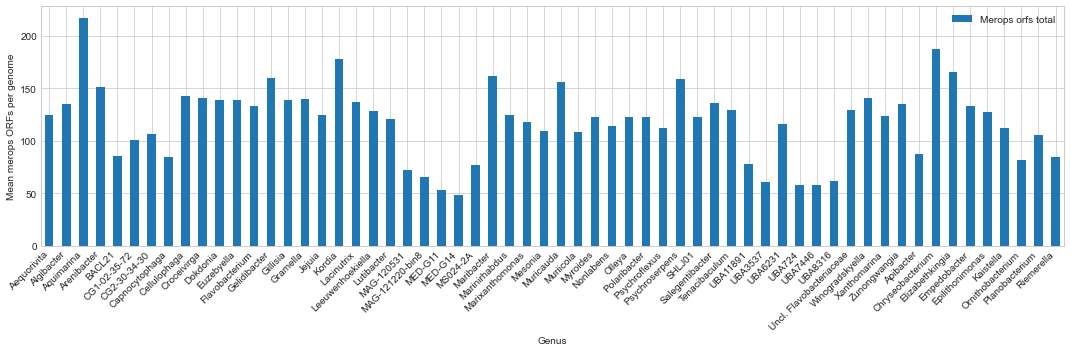

In [19]:
ax = df2.plot(kind="bar", figsize=(15,5))

plt.ylabel('Mean merops ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Merops_counts.svg", dpi=300)

# Plot2

In [20]:
df_namevfcode2 = df_namevfcode.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean()
df_namevfcode2["Total"] = df_namevfcode2.sum(axis=1)
df_namevfcode2 = df_namevfcode2.reset_index()

#df_namevfcode2 = df_namevfcode2.sort_values(by=["Family", "Genus"])
df_namevfcode2 = df_namevfcode2.drop(columns="Family")
#df_namevfcode2 = df_namevfcode2.sort_index(axis=1, ascending=False)
df_namevfcode2.head()

,Genus,1700122C07Rik protein,"2-hydroxy-6-oxo-6-phenylhexa-2,4-dienoate hydrolase",2210023G05RIK protein,9030624L02RIK-like protein,ADAM1 g.p.,ADAM1 peptidase,ADAM10 peptidase,ADAM12 peptidase,ADAM13 peptidase,ADAM19 peptidase,ADAM20 peptidase,ADAM21 peptidase,ADAM24 peptidase,ADAM26 peptidase,ADAM28 peptidase,ADAM8 peptidase,ADAM9 peptidase,ALE-1 glycylglycine endopeptidase,ALTERED MERISTEM PROGRAM1-like peptidase,AM-1 aminopeptidase,ARASP g.p.,ASUB peptidase,AT3G03240 protein,AT4g33090 g.p.,AT5G17720 protein,AT5G17780 protein,AT5G20060 protein,AT5G22460 protein,AaaA aminopeptidase,Aad peptidase,Aap1' aminopeptidase,AarA peptidase,Abhd2a protein,Afg3-like protein 2,AlbD protein,AmpH protein,Anbu protein,Ape2 aminopeptidase,Apr peptidase,AprP peptidase,AprX peptidase,AraSP peptidase,ArgJ protein,AsnB protein,AspA,At1g02560,At1g06260,At1g11080,At1g11090,At1g12750,At1g13270,At1g13610,At1g14270,At1g15045,At1g17430,At1g18360,At1g18600,At1g20380,At1g24140,At1g25220,At1g25290,At1g26120,At1g28110,At1g29840,At1g32190,At1g33540,At1g51760,At1g52580,At1g52760,At1g59970-type peptidase,At1g63660,At1g64670,At1g65630,At1g65640,At1g66670,At1g66900,At1g67420,At1g68620,At1g68900,At1g69020 g.p.,At1g70170,At1g71696,At1g72620,At1g73290,At1g73300,At1g73310,At1g73480,At1g74280,At1g76140,At1g77420,At1g78210,At2g15230 protein,At2g16570,At2g18360,At2g19550,At2g20725,At2g22990,At2g23000,At2g23010,At2g24200,At2g24320,At2g29050,At2g39400,At2g39410,At2g39420,At2g45040,At2g45600,At2g47630,At3g01690,At3g02720,At3g02875,At3g03990,At3g05350,At3g05780,At3g09690,At3g10450,At3g10840 protein,At3g12220,At3g16150,At3g16550,At3g26085,At3g27320,At3g27740,At3g30380,At3g47560,At3g47590,At3g48690,At3g52000,At3g52020,At3g53780,At3g54600,At3g55180,At3g56540,At3g57470,At3g57680,At4g10030,At4g10050,At4g16640,At4g17150,At4g20430,At4g23070,At4g24150,At4g29210,At4g30910,At4g31020,At4g33180/At4g33190,At4g34740,At4g36530,At4g36610,At4g36760 g.p.,At4g37040,At4g37470,At4g38880,At4g39650,At5g02970,At5g04710,At5g07250,At5g08100,At5g09430,At5g09640,At5g11650,At5g13520 g.p.,At5g13800,At5g14310,At5g14390,At5g15860,At5g16080,At5g16120,At5g16310,At5g19290,At5g19630,At5g19740,At5g19850,At5g20520,At5g20660,At5g21950,At5g23140,At5g23210,At5g23530,At5g24260,At5g25770,At5g26860,At5g36950,At5g38220,At5g38520,At5g39220,At5g40560,At5g41900,At5g42320,At5g46390,At5g51740,At5g53050 or MhpC protein,At5g54140,At5g56650,At5g56730,At5g59190,At5g60160,At5g62180,At5g67090,AtFtsH1 peptidase,AtFtsH10 peptidase,AtFtsH11 peptidase,AtFtsH3 peptidase,AtFtsH5 peptidase,B0464.9 g.p.,B0495.7 g.p.,BACCAC_01431 g.p.,BC026374 protein,BC4143 protein,BF9343_2924 g.p.,BG:DS00365.1 protein,BIRC-3 protein,BSNT_05883 g.p.,BSSC8_21440 g.p.,BSSC8_26020 g.p.,BSU23640 g.p.,BSU33620 g.p.,BSU6633_13517 g.p.,BSU6633_13792 g.p.,BSn5_05605 g.p.,BT3549 putative peptidase,BapA peptidase,BapF peptidase,BcepAP aminopeptidase,BepA,BioH protein,BlaR1 peptidase,BmSPI inhibitor,BmooMPalpha-I,Brcc36 isopeptidase,Bsubs1_010100013116 g.p.,C-terminal processing peptidase-1,C-terminal processing peptidase-2,C-terminal processing peptidase-3,C02G6.1 g.p.,C06C3.8 g.p.,C14orf29 protein,C31H5.1 g.p.,C31H5.6 g.p.,C35C5.2 g.p.,C44E12.1 g.p.,CAAX amino terminal peptidase,CC-III peptidase,CDF peptidase,CG10051 protein,CG10062 protein,CG1009 g.p.,CG10602 g.p.,CG11309 protein,CG11319,CG11428,CG11529 protein,CG11836 protein,CG11865 protein,CG11951 protein,CG11956 protein,CG11961 protein,CG12133 protein,CG12374 protein,CG13160 protein,CG15111 protein,CG15253 protein,CG15820 protein,CG15879 protein,CG17571 protein,CG17633 protein,CG18530 protein,CG18642,CG18735 protein,CG1882 protein,CG2528 protein,CG2915 protein,CG3097 protein,CG3108 protein,CG31343 protein,CG32379 protein,CG32523 protein,CG3502 protein,CG4017 protein,CG42750 g.p.,CG4420 g.p.,CG4927 protein,CG5367 protein,CG5377,CG5704 protein,CG5707 protein,CG5715 protein,CG5845 protein,CG5909 protein,CG6154 protein,CG6512 protein,CG6696 protein,CG6763 protein,CG7025 protein,CG7142 protein,CG7529 protein,

In [21]:
df_namevfcode3 = df_namevfcode2.copy().set_index("Genus").drop(columns=["Total"]).T
df_namevfcode3["Total"] = df_namevfcode3.sum(axis=1)
df_namevfcode3 = df_namevfcode3.sort_values(by="Total", ascending=False)
df_namevfcode4 = df_namevfcode3.head(20)
df_namevfcode4.head()

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia,Total
scaf_bp,3.200450e+06,4.651915e+06,2.431255e+06,5.446682e+06,5.102482e+06,2.271539e+06,2350943.00,2758554.250,2.677364e+06,4.245944e+06,4.747962e+06,3825681.750,3.531322e+06,4.069770e+06,3.187074e+06,3.441551e+06,4.289295e+06,3.804712e+06,4.031958e+06,3.610964e+06,3.577373e+06,3.853557e+06,2.774108e+06,5023650.500,3.531929e+06,3.880515e+06,3.310197e+06,1.651749e+06,1.418232e+06,998380.750,1.102608e+06,1.707874e+06,4.353462e+06,3.278027e+06,3.041754e+06,3.366335e+06,4.014315e+06,2611490.125,3703230.70,3.235067e+06,3.537084e+06,2.261645e+06,2.495737e+06,3.389998e+06,2.896568e+06,4.063492e+06,2.203070e+06,2.801786e+06,3.850273e+06,3.431158e+06,1735708.500,1.496250e+06,3.174269e+06,1.366016e+06,1.461915e+06,1.715000e+06,3.145185e+06,3.693981e+06,3.051921e+06,4.180181e+06,1.900625e+08
Mername-AA292 peptidase,2.642857e+00,2.444444e+00,1.857143e+00,3.256410e+00,2.500000e+00,1.800000e+00,2.25,2.750,1.400000e+00,2.904762e+00,2.108844e+00,2.500,3.181818e+00,1.932642e+00,2.772727e+00,1.741935e+00,1.666667e+00,1.657046e+00,2.583333e+00,2.454545e+00,2.000000e+00,2.888889e+00,1.312500e+00,4.000,2.666667e+00,1.973684e+00,1.666667e+00,1.517241e+00,1.363636e+00,1.000,1.500000e+00,2.157895e+00,2.444444e+00,2.000000e+00,2.000000e+00,2.947368e+00,3.132075e+00,2.750,2.16,3.000000e+00,2.692308e+00,2.222222e+00,1.272727e+00,2.157895e+00,2.411765e+00,1.500000e+00,1.000000e+00,2.166667e+00,2.368421e+00,2.573529e+00,1.875,2.250000e+00,2.538462e+00,1.555556e+00,1.916667e+00,1.500000e+00,2.000000e+00,2.472727e+00,2.090909e+00,3.384615e+00,1.328357e+02
dihydro-orotase,1.976190e+00,2.000000e+00,2.000000e+00,1.974359e+00,2.000000e+00,2.400000e+00,2.00,2.750,2.280000e+00,2.000000e+00,1.993197e+00,2.500,2.000000e+00,1.994819e+00,2.272727e-02,2.000000e+00,2.000000e+00,2.621392e+00,2.166667e+00,2.090909e+00,2.875000e+00,2.333333e+00,1.937500e+00,1.875,2.000000e+00,1.842105e+00,1.904762e+00,1.724138e+00,2.000000e+00,1.625,1.500000e+00,1.842105e+00,1.911111e+00,2.071429e+00,1.555556e+00,2.684211e+00,2.018868e+00,1.875,2.80,2.142857e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.140351e+00,3.470588e+00,2.416667e+00,2.016949e+00,2.250000e+00,2.263158e+00,2.000000e+00,1.750,2.000000e+00,2.000000e+00,1.666667e+00,2.083333e+00,1.750000e+00,1.857143e+00,2.018182e+00,1.909091e+00,1.923077e+00,1.208034e+02
YebA peptidase,1.666667e+00,2.000000e+00,1.904762e-01,2.025641e+00,1.954545e+00,2.266667e+00,1.50,2.125,2.013333e+00,1.047619e+00,7.755102e-01,2.625,1.636364e+00,0.000000e+00,2.272727e-02,1.935484e-01,2.888889e+00,1.521222e+00,2.166667e+00,1.909091e+00,2.187500e+00,2.000000e+00,3.750000e-01,2.625,2.222222e+00,1.657895e+00,2.095238e+00,2.034483e+00,1.545455e+00,1.750,1.333333e+00,1.578947e+00,2.444444e+00,2.142857e+00,1.555556e+00,1.736842e+00,1.584906e+00,1.125,1.14,1.928571e+00,1.461538e+00,1.555556e+00,6.363636e-01,2.298246e+00,1.647059e+00,3.083333e+00,0.000000e+00,1.750000e+00,3.105263e+00,2.014706e+00,1.750,1.500000e+00,1.153846e+00,1.333333e+00,1.500000e+00,1.583333e+00,2.000000e+00,2.163636e+00,2.272727e+00,1.923077e+00,1.003242e+02
YMXG peptidase,1.238095e+00,1.222222e+00,1.095238e+00,2.435897e+00,9.090909e-02,4.000000e-01,1.25,1.000,1.480000e+00,2.666667e+00,3.244898e+00,1.875,2.727273e+00,3.031088e+00,1.022727e+00,9.032258e-01,8.888889e-01,1.349745e+00,1.416667

In [22]:
df_namevfcode3[df_namevfcode3["Total"] < 100].sum(axis=0).to_frame().T

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia,Total
0,118.357143,128.444444,83.52381,209.179487,144.681818,78.8,94.625,99.25,78.773333,136.333333,182.207483,133.125,131.636364,161.031088,130.590909,123.032258,132.444444,127.633277,152.916667,131.727273,132.8125,117.444444,108.0,169.0,130.222222,122.789474,114.761905,67.068966,60.909091,49.25,43.833333,71.052632,154.177778,118.5,112.111111,102.315789,148.660377,102.25,116.94,107.321429,116.076923,78.111111,101.0,115.842105,104.352941,151.583333,81.711864,115.916667,127.526316,122.75,72.25,55.25,110.076923,53.666667,52.166667,57.25,123.52381,133.690909,117.454545,126.615385,6744.550348


In [23]:
df_namevfcode4.head()

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia,Total
scaf_bp,3.200450e+06,4.651915e+06,2.431255e+06,5.446682e+06,5.102482e+06,2.271539e+06,2350943.00,2758554.250,2.677364e+06,4.245944e+06,4.747962e+06,3825681.750,3.531322e+06,4.069770e+06,3.187074e+06,3.441551e+06,4.289295e+06,3.804712e+06,4.031958e+06,3.610964e+06,3.577373e+06,3.853557e+06,2.774108e+06,5023650.500,3.531929e+06,3.880515e+06,3.310197e+06,1.651749e+06,1.418232e+06,998380.750,1.102608e+06,1.707874e+06,4.353462e+06,3.278027e+06,3.041754e+06,3.366335e+06,4.014315e+06,2611490.125,3703230.70,3.235067e+06,3.537084e+06,2.261645e+06,2.495737e+06,3.389998e+06,2.896568e+06,4.063492e+06,2.203070e+06,2.801786e+06,3.850273e+06,3.431158e+06,1735708.500,1.496250e+06,3.174269e+06,1.366016e+06,1.461915e+06,1.715000e+06,3.145185e+06,3.693981e+06,3.051921e+06,4.180181e+06,1.900625e+08
Mername-AA292 peptidase,2.642857e+00,2.444444e+00,1.857143e+00,3.256410e+00,2.500000e+00,1.800000e+00,2.25,2.750,1.400000e+00,2.904762e+00,2.108844e+00,2.500,3.181818e+00,1.932642e+00,2.772727e+00,1.741935e+00,1.666667e+00,1.657046e+00,2.583333e+00,2.454545e+00,2.000000e+00,2.888889e+00,1.312500e+00,4.000,2.666667e+00,1.973684e+00,1.666667e+00,1.517241e+00,1.363636e+00,1.000,1.500000e+00,2.157895e+00,2.444444e+00,2.000000e+00,2.000000e+00,2.947368e+00,3.132075e+00,2.750,2.16,3.000000e+00,2.692308e+00,2.222222e+00,1.272727e+00,2.157895e+00,2.411765e+00,1.500000e+00,1.000000e+00,2.166667e+00,2.368421e+00,2.573529e+00,1.875,2.250000e+00,2.538462e+00,1.555556e+00,1.916667e+00,1.500000e+00,2.000000e+00,2.472727e+00,2.090909e+00,3.384615e+00,1.328357e+02
dihydro-orotase,1.976190e+00,2.000000e+00,2.000000e+00,1.974359e+00,2.000000e+00,2.400000e+00,2.00,2.750,2.280000e+00,2.000000e+00,1.993197e+00,2.500,2.000000e+00,1.994819e+00,2.272727e-02,2.000000e+00,2.000000e+00,2.621392e+00,2.166667e+00,2.090909e+00,2.875000e+00,2.333333e+00,1.937500e+00,1.875,2.000000e+00,1.842105e+00,1.904762e+00,1.724138e+00,2.000000e+00,1.625,1.500000e+00,1.842105e+00,1.911111e+00,2.071429e+00,1.555556e+00,2.684211e+00,2.018868e+00,1.875,2.80,2.142857e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.140351e+00,3.470588e+00,2.416667e+00,2.016949e+00,2.250000e+00,2.263158e+00,2.000000e+00,1.750,2.000000e+00,2.000000e+00,1.666667e+00,2.083333e+00,1.750000e+00,1.857143e+00,2.018182e+00,1.909091e+00,1.923077e+00,1.208034e+02
YebA peptidase,1.666667e+00,2.000000e+00,1.904762e-01,2.025641e+00,1.954545e+00,2.266667e+00,1.50,2.125,2.013333e+00,1.047619e+00,7.755102e-01,2.625,1.636364e+00,0.000000e+00,2.272727e-02,1.935484e-01,2.888889e+00,1.521222e+00,2.166667e+00,1.909091e+00,2.187500e+00,2.000000e+00,3.750000e-01,2.625,2.222222e+00,1.657895e+00,2.095238e+00,2.034483e+00,1.545455e+00,1.750,1.333333e+00,1.578947e+00,2.444444e+00,2.142857e+00,1.555556e+00,1.736842e+00,1.584906e+00,1.125,1.14,1.928571e+00,1.461538e+00,1.555556e+00,6.363636e-01,2.298246e+00,1.647059e+00,3.083333e+00,0.000000e+00,1.750000e+00,3.105263e+00,2.014706e+00,1.750,1.500000e+00,1.153846e+00,1.333333e+00,1.500000e+00,1.583333e+00,2.000000e+00,2.163636e+00,2.272727e+00,1.923077e+00,1.003242e+02
YMXG peptidase,1.238095e+00,1.222222e+00,1.095238e+00,2.435897e+00,9.090909e-02,4.000000e-01,1.25,1.000,1.480000e+00,2.666667e+00,3.244898e+00,1.875,2.727273e+00,3.031088e+00,1.022727e+00,9.032258e-01,8.888889e-01,1.349745e+00,1.416667

In [24]:
df_namevfcode5 = pd.concat([df_namevfcode4, df_namevfcode3[df_namevfcode3["Total"] < 100].sum(axis=0).to_frame().T])

df_namevfcode5 = df_namevfcode5.sort_values(by="Total", ascending=False).drop(columns="Total")
df_namevfcode5.head()

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia
scaf_bp,3.200450e+06,4.651915e+06,2.431255e+06,5.446682e+06,5.102482e+06,2.271539e+06,2350943.000,2758554.250,2.677364e+06,4.245944e+06,4.747962e+06,3825681.750,3.531322e+06,4.069770e+06,3.187074e+06,3.441551e+06,4.289295e+06,3.804712e+06,4.031958e+06,3.610964e+06,3.577373e+06,3.853557e+06,2.774108e+06,5023650.500,3.531929e+06,3.880515e+06,3.310197e+06,1.651749e+06,1.418232e+06,998380.750,1.102608e+06,1.707874e+06,4.353462e+06,3.278027e+06,3.041754e+06,3.366335e+06,4.014315e+06,2611490.125,3703230.70,3.235067e+06,3.537084e+06,2.261645e+06,2.495737e+06,3.389998e+06,2.896568e+06,4.063492e+06,2.203070e+06,2.801786e+06,3.850273e+06,3.431158e+06,1735708.500,1.496250e+06,3.174269e+06,1.366016e+06,1.461915e+06,1.715000e+06,3.145185e+06,3.693981e+06,3.051921e+06,4.180181e+06
0,1.183571e+02,1.284444e+02,8.352381e+01,2.091795e+02,1.446818e+02,7.880000e+01,94.625,99.250,7.877333e+01,1.363333e+02,1.822075e+02,133.125,1.316364e+02,1.610311e+02,1.305909e+02,1.230323e+02,1.324444e+02,1.276333e+02,1.529167e+02,1.317273e+02,1.328125e+02,1.174444e+02,1.080000e+02,169.000,1.302222e+02,1.227895e+02,1.147619e+02,6.706897e+01,6.090909e+01,49.250,4.383333e+01,7.105263e+01,1.541778e+02,1.185000e+02,1.121111e+02,1.023158e+02,1.486604e+02,102.250,116.94,1.073214e+02,1.160769e+02,7.811111e+01,1.010000e+02,1.158421e+02,1.043529e+02,1.515833e+02,8.171186e+01,1.159167e+02,1.275263e+02,1.227500e+02,72.250,5.525000e+01,1.100769e+02,5.366667e+01,5.216667e+01,5.725000e+01,1.235238e+02,1.336909e+02,1.174545e+02,1.266154e+02
Mername-AA292 peptidase,2.642857e+00,2.444444e+00,1.857143e+00,3.256410e+00,2.500000e+00,1.800000e+00,2.250,2.750,1.400000e+00,2.904762e+00,2.108844e+00,2.500,3.181818e+00,1.932642e+00,2.772727e+00,1.741935e+00,1.666667e+00,1.657046e+00,2.583333e+00,2.454545e+00,2.000000e+00,2.888889e+00,1.312500e+00,4.000,2.666667e+00,1.973684e+00,1.666667e+00,1.517241e+00,1.363636e+00,1.000,1.500000e+00,2.157895e+00,2.444444e+00,2.000000e+00,2.000000e+00,2.947368e+00,3.132075e+00,2.750,2.16,3.000000e+00,2.692308e+00,2.222222e+00,1.272727e+00,2.157895e+00,2.411765e+00,1.500000e+00,1.000000e+00,2.166667e+00,2.368421e+00,2.573529e+00,1.875,2.250000e+00,2.538462e+00,1.555556e+00,1.916667e+00,1.500000e+00,2.000000e+00,2.472727e+00,2.090909e+00,3.384615e+00
dihydro-orotase,1.976190e+00,2.000000e+00,2.000000e+00,1.974359e+00,2.000000e+00,2.400000e+00,2.000,2.750,2.280000e+00,2.000000e+00,1.993197e+00,2.500,2.000000e+00,1.994819e+00,2.272727e-02,2.000000e+00,2.000000e+00,2.621392e+00,2.166667e+00,2.090909e+00,2.875000e+00,2.333333e+00,1.937500e+00,1.875,2.000000e+00,1.842105e+00,1.904762e+00,1.724138e+00,2.000000e+00,1.625,1.500000e+00,1.842105e+00,1.911111e+00,2.071429e+00,1.555556e+00,2.684211e+00,2.018868e+00,1.875,2.80,2.142857e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.140351e+00,3.470588e+00,2.416667e+00,2.016949e+00,2.250000e+00,2.263158e+00,2.000000e+00,1.750,2.000000e+00,2.000000e+00,1.666667e+00,2.083333e+00,1.750000e+00,1.857143e+00,2.018182e+00,1.909091e+00,1.923077e+00
YebA peptidase,1.666667e+00,2.000000e+00,1.904762e-01,2.025641e+00,1.954545e+00,2.266667e+00,1.500,2.125,2.013333e+00,1.047619e+00,7.755102e-01,2.625,1.636364e+00,0.000000e+00,2.272727e-02,1.935484e-01,2.888889e+00,1.521222e+00,2.166667e+00,1.909091e+00,2.187500e+00,2.000000e+00,3.750000e-

# Comparison

In [25]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics.head()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192


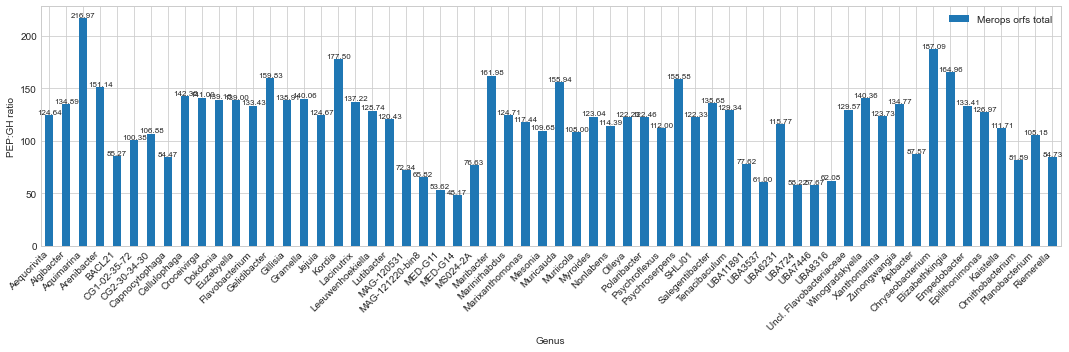

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,index,Merops orfs total,Orfs_anno_merops%,Assembly accession,Genus,Family,scaf_bp,Origin,merops,PEP:GH
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133,GCA_002431085.1,132,4.786077,GCA_002431085.1,Empedobacter,Weeksellaceae,2944839.0,Non_marine,132,2.808511
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036,GCA_002302445.1,83,3.728661,GCA_002302445.1,Capnocytophaga,Flavobacteriaceae,2493828.0,Non_marine,83,1.276923
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614,GCA_014075215.1,102,2.284434,GCA_014075215.1,SCGC-AAA160-P02,Flavobacteriaceae,4308101.0,Marine,102,1.961538
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151,GCA_900186555.1,103,4.489974,GCA_900186555.1,Flavobacterium,Flavobacteriaceae,2572086.0,Unclassified,103,1.839286
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192,GCA_001670625.1,88,4.444444,GCA_001670625.1,Riemerella,Weeksellaceae,2138237.0,Unclassified,88,2.315789


In [26]:
merge = pd.merge(statistics, merops, how="left", left_on="Unnamed: 0", right_on="index")
merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="left", left_on="Unnamed: 0", right_on="Assembly accession")
merge["merops"] = merge["Merops orfs total"]
merge["cazymes"] = merge["cazymes"]
merge["PEP:GH"] = merge["Merops orfs total"]/merge["cazymes"]
ax = df2.plot(kind="bar",figsize=(15,5))

plt.ylabel('PEP:GH ratio')
plt.xticks(rotation=45, horizontalalignment='right')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

plt.tight_layout()
plt.show()

ax.figure.savefig("Ratio.svg", dpi=300)
merge.head()

In [36]:
merge_marine = merge.copy()
merge_marine = merge_marine.groupby("Origin").mean()



merge_marine.head()

,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Merops orfs total,Orfs_anno_merops%,scaf_bp,merops,PEP:GH
Origin,,,,,,,,,,,,,
Marine,2834.411616,4768.844697,1125.203283,1812.676768,76.088384,41.211856,65.260765,2.573654,119.523990,4.310478,3.180690e+06,119.523990,1.918875
Non_marine,3357.024499,5436.363029,1270.129176,2071.428731,89.789532,38.506672,62.192016,2.598189,139.018931,4.144399,3.734743e+06,139.018931,1.858021
Unclassified,3350.882828,5529.400000,1281.897980,2088.554545,96.212121,38.923722,62.826646,2.776559,139.371717,4.171308,3.757034e+06,139.371717,1.740238


In [37]:
merge_marine[["orfs", "cazymes", "Merops orfs total", "PEP:GH"]]

,orfs,cazymes,Merops orfs total,PEP:GH
Origin,,,,
Marine,2834.411616,76.088384,119.523990,1.918875
Non_marine,3357.024499,89.789532,139.018931,1.858021
Unclassified,3350.882828,96.212121,139.371717,1.740238


In [38]:
merge_marine.head()

,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Merops orfs total,Orfs_anno_merops%,scaf_bp,merops,PEP:GH
Origin,,,,,,,,,,,,,
Marine,2834.411616,4768.844697,1125.203283,1812.676768,76.088384,41.211856,65.260765,2.573654,119.523990,4.310478,3.180690e+06,119.523990,1.918875
Non_marine,3357.024499,5436.363029,1270.129176,2071.428731,89.789532,38.506672,62.192016,2.598189,139.018931,4.144399,3.734743e+06,139.018931,1.858021
Unclassified,3350.882828,5529.400000,1281.897980,2088.554545,96.212121,38.923722,62.826646,2.776559,139.371717,4.171308,3.757034e+06,139.371717,1.740238


In [39]:
merge_marine2 = merge.copy()
merge_marine2 = merge_marine2[merge_marine2["Origin"] != "Unclassified"]
merge_marine2 = merge_marine2.groupby("Origin").mean()
merge_marine2["merops_permb"] = merge_marine2["Merops orfs total"]/merge_marine2["scaf_bp"]*1000000
merge_marine2["cazymes_permb"] = merge_marine2["cazymes"]/merge_marine2["scaf_bp"]*1000000
merge_marine2["PEP:GH"] = merge_marine2["Merops orfs total"]/merge_marine2["cazymes"]
merge_marine2["PEP:GH_permb"] = merge_marine2["merops_permb"]/merge_marine2["cazymes_permb"]
merge_marine2.head()
merge_marine2[["PEP:GH","PEP:GH_permb"]]

,PEP:GH,PEP:GH_permb
Origin,,
Marine,1.570857,1.570857
Non_marine,1.548275,1.548275


In [40]:
merge

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,index,Merops orfs total,Orfs_anno_merops%,Assembly accession,Genus,Family,scaf_bp,Origin,merops,PEP:GH
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133,GCA_002431085.1,132,4.786077,GCA_002431085.1,Empedobacter,Weeksellaceae,2944839.0,Non_marine,132,2.808511
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036,GCA_002302445.1,83,3.728661,GCA_002302445.1,Capnocytophaga,Flavobacteriaceae,2493828.0,Non_marine,83,1.276923
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614,GCA_014075215.1,102,2.284434,GCA_014075215.1,SCGC-AAA160-P02,Flavobacteriaceae,4308101.0,Marine,102,1.961538
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151,GCA_900186555.1,103,4.489974,GCA_900186555.1,Flavobacterium,Flavobacteriaceae,2572086.0,Unclassified,103,1.839286
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192,GCA_001670625.1,88,4.444444,GCA_001670625.1,Riemerella,Weeksellaceae,2138237.0,Unclassified,88,2.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,GCA_000744835.1,3236,5914,1415,2231,123,43.726823,68.943140,3.800989,GCA_000744835.1,122,3.770087,GCA_000744835.1,Flavobacterium,Flavobacteriaceae,3790620.0,Marine,122,0.991870
2677,GCA_000422365.1,2688,4856,1130,1787,70,42.038690,66.480655,2.604167,GCA_000422365.1,117,4.352679,GCA_000422365.1,Mesoflavibacter,Flavobacteriaceae,2966206.0,Marine,117,1.671429
2678,GCA_000243235.1,3516,6027,1393,2326,105,39.618885,66.154721,2.986348,GCA_000243235.1,152,4.323094,GCA_000243235.1,Gillisia,Flavobacteriaceae,3966857.0,Non_marine,152,1.447619
2679,GCA_006777945.1,2393,4131,997,1550,55,41.663184,64.772252,2.298370,GCA_006777945.1,105,4.387798,GCA_006777945.1,Flavobacterium,Flavobacteriaceae,2668540.0,Unclassified,105,1.909091


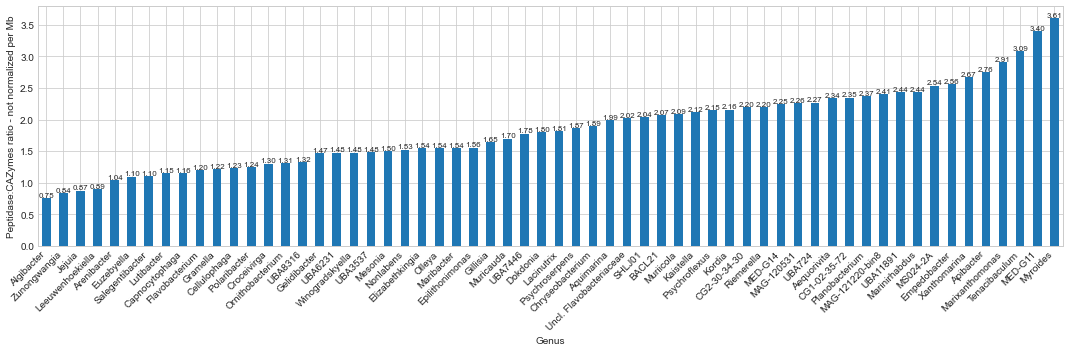

In [41]:
df1 = merge.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean().reset_index().sort_values(by=["Family","Genus"]).set_index("Genus")

df1["merops_permb"] = df1["Merops orfs total"]/df1["scaf_bp"]*1000000
df1["cazymes_permb"] = df1["cazymes"]/df1["scaf_bp"]*1000000
df1["PEP:GH"] = df1["Merops orfs total"]/df1["cazymes"]
df1["PEP:GH_permb"] = df1["merops_permb"]/df1["cazymes_permb"]
df1["P2"] = df1["merops"]/(df1["cazymes"]+df1["merops"])*2

df2 = df1.sort_values(by="PEP:GH")

df2[df2["PEP:GH"]>=1].sort_values(by="PEP:GH", ascending=True).head()



ax = df2["PEP:GH"].plot(kind="bar",figsize=(15,5))

plt.ylabel('Peptidase:CAZymes ratio - not normalized per Mb')
plt.xticks(rotation=45, horizontalalignment='right')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

plt.tight_layout()
plt.show()

ax.figure.savefig("Ratio.svg", dpi=300)

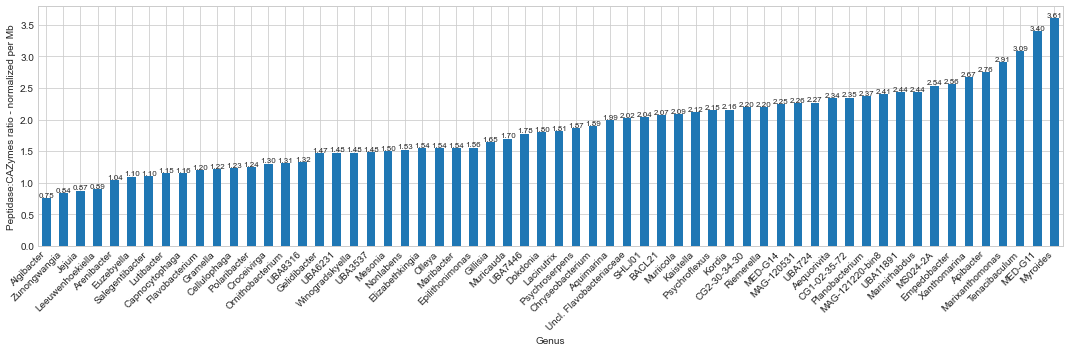

In [42]:
ax = df2["PEP:GH_permb"].plot(kind="bar",figsize=(15,5))

plt.ylabel('Peptidase:CAZymes ratio - normalized per Mb')
plt.xticks(rotation=45, horizontalalignment='right')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

plt.tight_layout()
plt.show()

ax.figure.savefig("Ratio.svg", dpi=300)

In [43]:
dfx = merge.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).describe()#.reset_index().sort_values(by=["Family","Genus"])~
dfx.columns = [' '.join(col).strip() for col in dfx.columns.values]
dfx.columns = dfx.columns.get_level_values(0)
dfx = dfx.reset_index()
dfx = dfx.sort_values(by=["Family", "Genus"])
dfx = dfx.set_index("Genus")
#.set_index("Genus")
#df1["P"] = df1["Merops orfs total"]/(df1["cazymes"]+df1["Merops orfs total"])*2
#df1["P2"] = df1["merops_permb"]/(df1["cazymes_permb"]+df1["merops_permb"])*2
dfx.head()

,Family,orfs count,orfs mean,orfs std,orfs min,orfs 25%,orfs 50%,orfs 75%,orfs max,pfam count,pfam mean,pfam std,pfam min,pfam 25%,pfam 50%,pfam 75%,pfam max,ko count,ko mean,ko std,ko min,ko 25%,ko 50%,ko 75%,ko max,cog count,cog mean,cog std,cog min,cog 25%,cog 50%,cog 75%,cog max,cazymes count,cazymes mean,cazymes std,cazymes min,cazymes 25%,cazymes 50%,cazymes 75%,cazymes max,Orfs_anno_ko% count,Orfs_anno_ko% mean,Orfs_anno_ko% std,Orfs_anno_ko% min,Orfs_anno_ko% 25%,Orfs_anno_ko% 50%,Orfs_anno_ko% 75%,Orfs_anno_ko% max,Orfs_anno_cog% count,Orfs_anno_cog% mean,Orfs_anno_cog% std,Orfs_anno_cog% min,Orfs_anno_cog% 25%,Orfs_anno_cog% 50%,Orfs_anno_cog% 75%,Orfs_anno_cog% max,Orfs_anno_cazymes% count,Orfs_anno_cazymes% mean,Orfs_anno_cazymes% std,Orfs_anno_cazymes% min,Orfs_anno_cazymes% 25%,Orfs_anno_cazymes% 50%,Orfs_anno_cazymes% 75%,Orfs_anno_cazymes% max,Merops orfs total count,Merops orfs total mean,Merops orfs total std,Merops orfs total min,Merops orfs total 25%,Merops orfs total 50%,Merops orfs total 75%,Merops orfs total max,Orfs_anno_merops% count,Orfs_anno_merops% mean,Orfs_anno_merops% std,Orfs_anno_merops% min,Orfs_anno_merops% 25%,Orfs_anno_merops% 50%,Orfs_anno_merops% 75%,Orfs_anno_merops% max,scaf_bp count,scaf_bp mean,scaf_bp std,scaf_bp min,scaf_bp 25%,scaf_bp 50%,scaf_bp 75%,scaf_bp max,merops count,merops mean,merops std,merops min,merops 25%,merops 50%,merops 75%,merops max,PEP:GH count,PEP:GH mean,PEP:GH std,PEP:GH min,PEP:GH 25%,PEP:GH 50%,PEP:GH 75%,PEP:GH max
Genus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aequorivita,Flavobacteriaceae,42.0,2958.714286,286.041809,2178.0,2864.50,2997.5,3081.50,3622.0,42.0,5003.000000,583.813493,3268.0,4709.25,5175.0,5296.75,6052.0,42.0,1139.166667,104.868772,842.0,1102.75,1163.0,1195.5,1349.0,42.0,1827.642857,181.142017,1361.0,1763.00,1869.5,1915.75,2262.0,42.0,53.309524,9.549583,20.0,50.25,55.5,58.50,72.0,42.0,38.569948,2.117442,30.903994,37.595241,38.974983,39.744368,43.497758,42.0,61.822365,2.970920,50.210231,60.485832,62.354370,63.569363,67.590705,42.0,1.796647,0.261310,0.801282,1.732871,1.846056,1.962686,2.254933,42.0,124.642857,16.007348,83.0,115.5,126.0,130.75,167.0,42.0,4.210442,0.328778,3.083392,4.071686,4.240784,4.439570,4.711506,42.0,3.200450e+06,3.374418e+05,2300656.0,3081628.25,3193359.0,3327236.0,4042904.0,42.0,124.642857,16.007348,83.0,115.5,126.0,130.75,167.0,42.0,2.390956,0.381283,1.925926,2.203571,2.287088,2.438595,4.150000
Algibacter,Flavobacteriaceae,9.0,4080.777778,624.058847,3455.0,3849.00,3851.0,3920.00,5561.0,9.0,6760.111111,227.073471,6260.0,6632.00,6838.0,6840.00,6991.0,9.0,1593.888889,148.304117,1416.0,1542.00,1548.0,1591.0,1923.0,9.0,2521.000000,211.792941,2275.0,2442.00,2443.0,2488.00,2998.0,9.0,178.888889,18.751296,139.0,168.00,183.0,192.00,199.0,9.0,39.321717,1.975820,34.580111,39.477727,40.192258,40.218239,40.984081,9.0,62.255655,3.524028,53.911167,63.412101,63.469388,63.568868,65.846599,9.0,4.441777,0.622105,3.290775,4.023155,4.444444,4.988309,5.076531,9.0,134.888889,6.772083,127.0,131.0,131.0,140.00,148.0,9.0,3.347715,0.328416,2.661392,3.401714,3.403481,3.571429,3.675832,9.0,4.651915e+06,1.936653e+05,4167837.0,4638103.00,4705407.0,4707503.0,4816342.0,9.0,134.888889,6.772083,127.0,131.0,131.0,140.00,148.0,9.0,0.761134,0.083292,0.682292,0.682292,0.754190,0.808743,0.913669
Aquimarina,Flavobacteriaceae,39.0,4699.179487,936.937027,1734.0,4356.00,4965.0,5304.00,6340.0,39.0,7480.384615,1403.229576,2863.0,6892.00,7966.0,8420.00,8868.0,39.0,1615.974359,264.050283,726.0,1519.00,1732.0,1792.0,1894.0,39.0,2742.461538,501.925757,1108.0,2561.50,2946.0,3070.50,3266.0,39.0,109.076923,37.198886,34.0,87.50,99.0,133.50,173.0,39.0,34.756690,2.216834,29.873817,33.605750,34.385151,35.905699,41.868512,39.0,58.658220,2.619730,51.514196,57.367381,58.825702,59.944217,65.784439,39.0,2.314977,0.618838,1.392642,1.770503,2.171348,2.902580,3.620934,39.0,216.974359,51.995692,65.0,189.0,228.0,240.50,291.0

In [44]:
x = dfx[["cazymes_permb mean","merops_permb mean","cazymes_permb std","merops_permb std"]].reset_index()
#x = x.melt(id_vars="Genus")
x.head()

KeyError: "None of [Index(['cazymes_permb mean', 'merops_permb mean', 'cazymes_permb std',\n       'merops_permb std'],\n      dtype='object')] are in the [columns]"

In [ ]:
means = dfx[["cazymes_permb mean","merops_permb mean"]]
means = means.rename(columns={"cazymes_permb mean":"cazymes", "merops_permb mean":"merops"})
means.head()

std = dfx[["cazymes_permb std","merops_permb std"]]
std = std.rename(columns={"cazymes_permb std":"cazymes", "merops_permb std":"merops"})
std.head()

,cazymes,merops
Genus,,
Aequorivita,2.397458,2.542492
Algibacter,2.792471,1.223070
Aquimarina,5.208840,4.856599
Arenibacter,3.948996,2.703904
BACL21,1.994753,2.480800


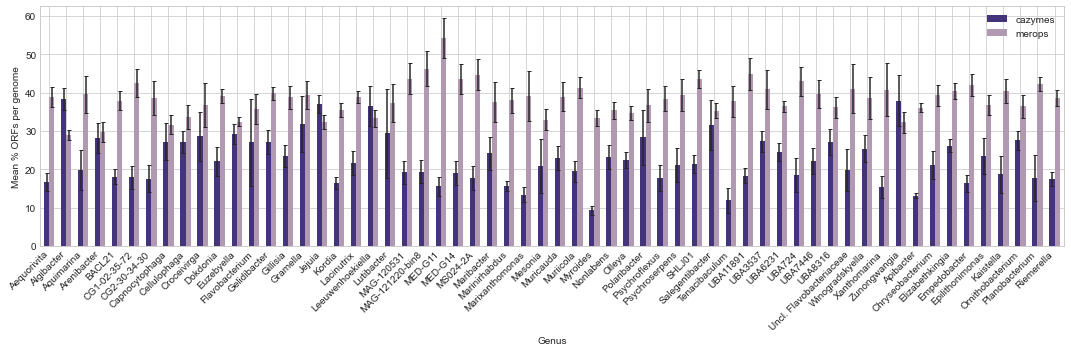

In [ ]:
fig, ax = plt.subplots()

means.plot.bar(ax=ax, figsize=(15,5), color=["#44347c","#b199b1"], yerr=std,width=0.6, lw=0.1, capsize=2)

plt.ylabel('Mean % ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()
ax.figure.savefig("f7_1.svg", dpi=300)

In [ ]:
print(df2["PEP:GH"].to_frame().reset_index()["Genus"].to_list())

['Algibacter', 'Zunongwangia', 'Jejuia', 'Leeuwenhoekiella', 'Arenibacter', 'Euzebyella', 'Salegentibacter', 'Lutibacter', 'Capnocytophaga', 'Flavobacterium', 'Gramella', 'Cellulophaga', 'Polaribacter', 'Croceivirga', 'Ornithobacterium', 'UBA8316', 'Gelidibacter', 'UBA6231', 'Winogradskyella', 'UBA3537', 'Mesonia', 'Nonlabens', 'Elizabethkingia', 'Olleya', 'Maribacter', 'Epilithonimonas', 'Gillisia', 'Muricauda', 'UBA7446', 'Dokdonia', 'Lacinutrix', 'Psychroserpens', 'Chryseobacterium', 'Aquimarina', 'Uncl. Flavobacteriaceae', 'SHLJ01', 'BACL21', 'Muriicola', 'Kaistella', 'Psychroflexus', 'Kordia', 'CG2-30-34-30', 'Riemerella', 'MED-G14', 'MAG-120531', 'UBA724', 'Aequorivita', 'CG1-02-35-72', 'Planobacterium', 'MAG-121220-bin8', 'UBA11891', 'Marinirhabdus', 'MS024-2A', 'Empedobacter', 'Xanthomarina', 'Apibacter', 'Marixanthomonas', 'Tenacibaculum', 'MED-G11', 'Myroides']


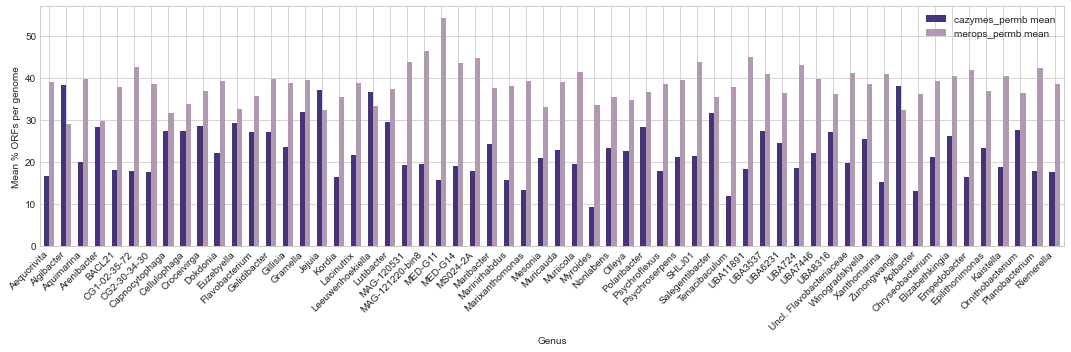

In [ ]:
ax = dfx[["cazymes_permb mean","merops_permb mean"]].plot(kind="bar", figsize=(15,5), color=["#44347c","#b199b1"]
,width=0.6)

#plt.errorbar(dfx.index, yerr="cazymes_permb std")


plt.ylabel('Mean % ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

#ax.figure.savefig("Merops_relabund.svg", dpi=300)

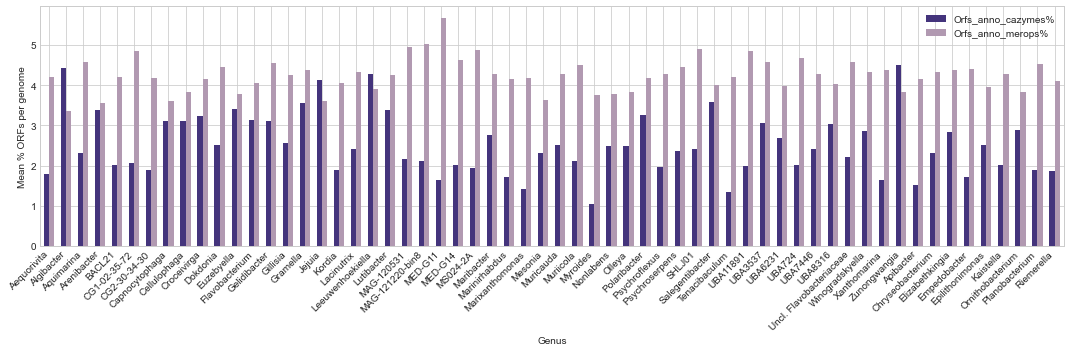

In [ ]:
#plt.style.use('fivethirtyeight') 
ax = df1[["Orfs_anno_cazymes%","Orfs_anno_merops%"]].plot(kind="bar", figsize=(15,5), color=["#44347c","#b199b1"],width=0.6)

plt.ylabel('Mean % ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

#ax.figure.savefig("Merops_relabund.svg", dpi=300)

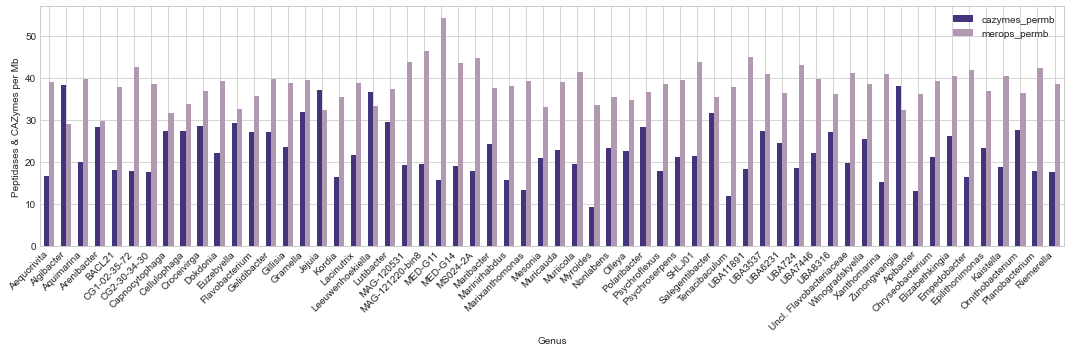

In [ ]:
#plt.style.use('fivethirtyeight') 
ax = df1[["cazymes_permb","merops_permb"]].plot(kind="bar", figsize=(15,5), color=["#44347c","#b199b1"],width=0.6)

plt.ylabel('Peptidases & CAZymes per Mb')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("per_Mb.svg", dpi=300)

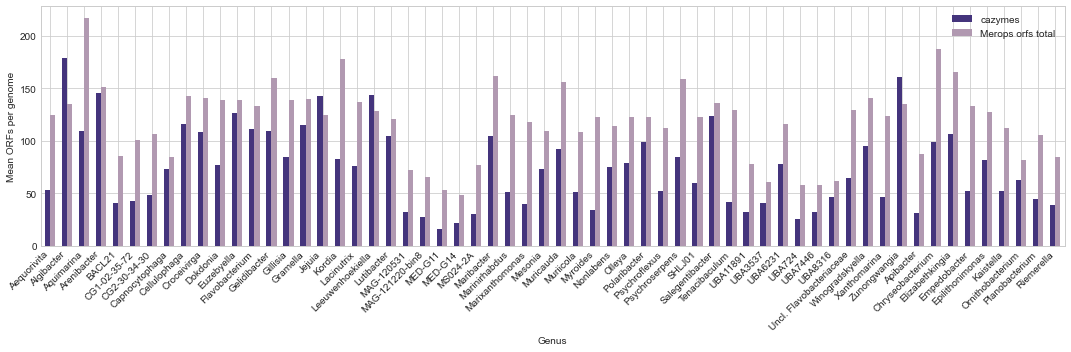

In [ ]:
ax = df1[["cazymes","Merops orfs total"]].plot(kind="bar", figsize=(15,5), color=["#44347c","#b199b1"],width=0.6)

plt.ylabel('Mean ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Merops_counts.svg", dpi=300)

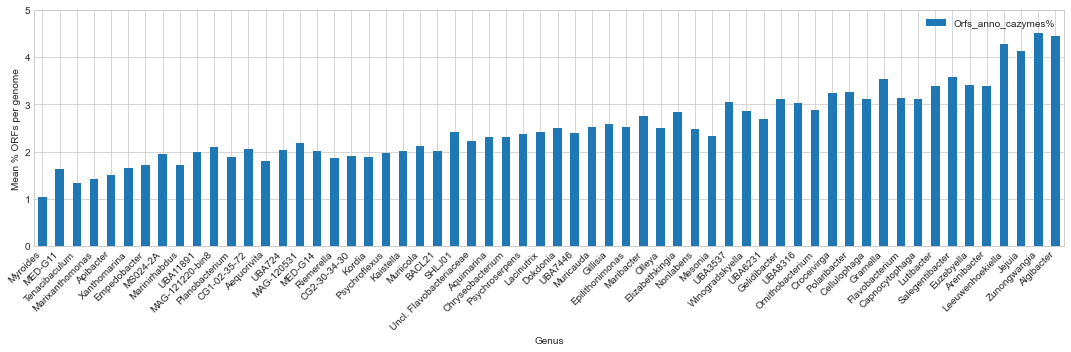

In [ ]:
df3 = df1.sort_values(by="PEP:GH",ascending=False)
ax = df3[["Orfs_anno_cazymes%"]].plot(kind="bar", figsize=(15,5), )
ax.set_ylim(0,5)
plt.ylabel('Mean % ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


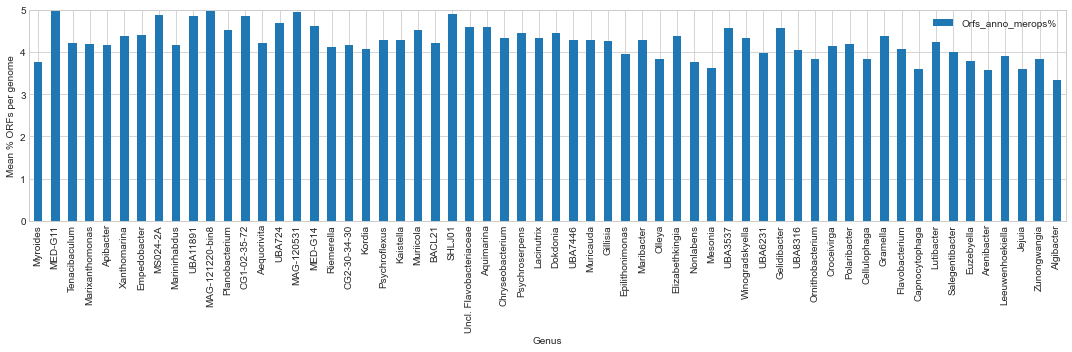

In [ ]:
ax = df3[["Orfs_anno_merops%"]].plot(kind="bar", figsize=(15,5))
ax.set_ylim(0,5)
plt.ylabel('Mean % ORFs per genome')
#plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()
